In [49]:
### 🔧 TAREA
#Antes de entrenar la red neuronal, modifica los hiperparámetros en `config.yaml`, especialmente:
#- `hidden_layers`: cambia el número de capas o neuronas.
#- `activation`: prueba funciones como `tanh` o `elu`.
#- `epochs`: aumenta o reduce el número de épocas.
#
#Luego, vuelve a ejecutar este notebook y observa cómo cambia el rendimiento.

In [50]:
import os
print(os.getcwd())

import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev
import pandas as pd
import numpy as np
import yaml

c:\Users\homel\OneDrive - Universidad San Sebastian\Escritorio\DeepNeuralNetworkUSS\Projects\Credit\notebooks


In [51]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [52]:
# 🧠 Construir el modelo
input_dim = X_train.shape[1]
nn_model = model.build_model(config, input_dim)

c:\Users\homel\OneDrive - Universidad San Sebastian\Escritorio\DeepNeuralNetworkUSS\Projects\Credit\dl_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# 🚀 Entrenar el modelo
history = train.train_model(nn_model, X_train, y_train, config)

Epoch 1/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6513 - loss: 0.6561 - val_accuracy: 0.7387 - val_loss: 0.5717
Epoch 2/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7410 - loss: 0.5691 - val_accuracy: 0.7429 - val_loss: 0.5535
Epoch 3/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.7465 - loss: 0.5450 - val_accuracy: 0.7447 - val_loss: 0.5469
Epoch 4/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7516 - loss: 0.5401 - val_accuracy: 0.7529 - val_loss: 0.5336
Epoch 5/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7521 - loss: 0.5337 - val_accuracy: 0.7581 - val_loss: 0.5355
Epoch 6/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7552 - loss: 0.5331 - val_accuracy: 0.7529 - val_loss: 0.5315
Epoch 7/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7551 - loss: 0.5282 - val_accuracy: 0.7589 - val_loss: 0.5260
Epoch 8/25
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7574 - loss: 0.5209 

In [54]:
# 💾 Guardar modelo entrenado
utils.save_model(nn_model, path="../models/nn_model.keras")

✅ Modelo guardado en ../models/nn_model.keras


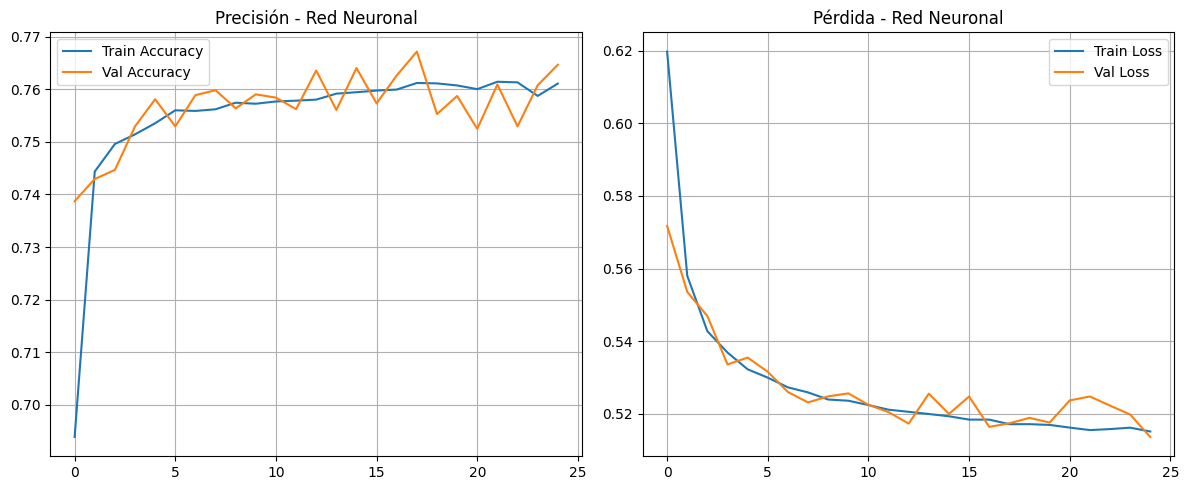

In [55]:
# 📈 Visualizar evolución del entrenamiento
utils.plot_training_history(history, model_name="Red Neuronal")

# Preguntas de reflexión

## A. ¿Ves signos de sobreajuste en las curvas de pérdida o precisión?

No se observan señales marcadas de sobreajuste. La precisión de entrenamiento y validación crecen de forma pareja y se mantienen cercanas. La pérdida en la validación no aumenta significativamente al final del entrenamiento, lo cual es señal de que el modelo generaliza bien. En una o dos iteraciones (por ejemplo, la iteración 3), la curva de pérdida de validación presenta una ligera oscilación al alza al final, lo que podría indicar el inicio de un sobreajuste leve, pero no es alarmante.

No hay sobreajuste marcado, pero se recomienda monitorear si se entrena por más épocas o con arquitecturas más complejas.

## B. ¿Cuál fue la época donde la validación alcanzó su mejor punto? 

Al observar las curvas en el archivo .doc donde están captadas las distintas iteraciones realizadas, el mejor punto parece estar entre las épocas 15 y 25.

En la iteración 1 y 4, la pérdida de validación parece estabilizarse o alcanzar su mínimo alrededor de la época 16 o 17. Y en la iteración 3, el mejor punto ocurre entre las épocas 20 y 25. Esto sugiere que el modelo ya no mejora significativamente después de la época 18, por lo que incluso podrías detener el entrenamiento antes, usando early stopping.

## C. ¿Qué pasaría si entrenaras con más (o menos) datos?

> Entrenar con más datos Mejora la capacidad del modelo para generalizar, ofrece menos riesgo de sobreajuste y permite entrenar modelos un poco mas complejos. Probablemente podamos observar curvas mas suaves y posibles mejoras en las métricas, todo esto suponiendo que los datos tiene un buen preprocesamiento y balanceo.

> Entrenar con menos datos puede incorporar señales de sobreajuste y hacer que el modelo se aprenda los datos y no sea eficaz.


> Más datos casi siempre ayudan, especialmente si están bien distribuidos y representan todos los casos del problema.